## Netflix Movies and TV Shows – Exploratory Data Analysis

This notebook explores a dataset of movies and TV shows available on Netflix.
The goal is to understand content trends, genres, release patterns,
and limitations of the dataset using exploratory data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup and Data Loading

The following section imports the required Python libraries and loads the Netflix dataset locally. The dataset file is excluded from GitHub
using `.gitignore`.

In [2]:
df = pd.read_csv("NetFlix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


### Dataset Overview

The dataset contains information on Netflix movies and TV shows,
including content type, release year, duration, genre, country,
cast, and director.

It includes thousands of titles spanning multiple decades and
a mix of categorical and numeric variables, making it suitable
for descriptive and exploratory data analysis.


In [4]:
df.info

<bound method DataFrame.info of      show_id     type                                      title  \
0         s1  TV Show                                         3%   
1        s10    Movie                                       1920   
2       s100    Movie                                 3 Heroines   
3      s1000    Movie  Blue Mountain State: The Rise of Thadland   
4      s1001  TV Show                             Blue Planet II   
...      ...      ...                                        ...   
7782    s995  TV Show                                 Blown Away   
7783    s996  TV Show                              Blue Exorcist   
7784    s997    Movie                  Blue Is the Warmest Color   
7785    s998    Movie                               Blue Jasmine   
7786    s999    Movie                                   Blue Jay   

                 director                                               cast  \
0                     NaN  João Miguel, Bianca Comparato, Michel Gomes,

## Missing Values

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Several columns contain missing values, particularly director, cast, and country. This is fairly common in real-world media datasets. While these gaps limit some detailed analysis, they do not prevent us from exploring overall trends and patterns.

## Summary Statistics

Summary statistics provide an overview of the distribution and range
of values in the dataset

In [7]:
df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787.000000,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,NaN,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,1-Jan-20,NaN,TV-MA,NaN,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,NaN,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,69.122769,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,50.950743,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,88.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,106.000000,NaN,NaN


Most titles in the dataset were released in recent years, showing that
Netflix’s catalog is heavily focused on newer content. The wide range
of duration values reflects the mix of movies and TV shows, which makes
average duration less meaningful on its own.

## Graph 1: Movies vs TV Shows

This section compares the number of movies and TV shows available
in the Netflix dataset.

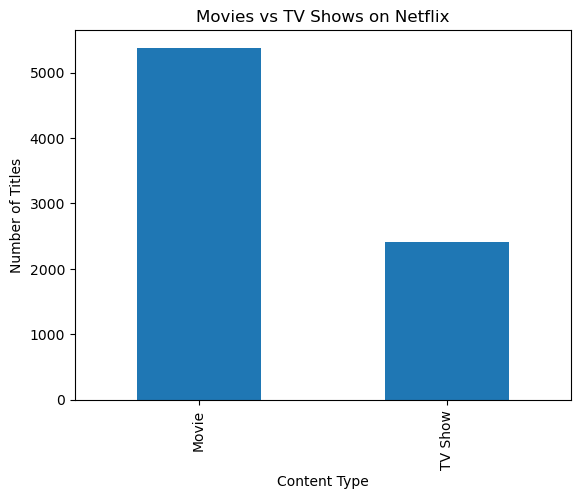

In [8]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

Movies make up a larger portion of Netflix’s catalog compared to TV shows.
This suggests that while Netflix has expanded its original series,
movies still play a major role in its content library.

## Graph 2: Content Released Over Time

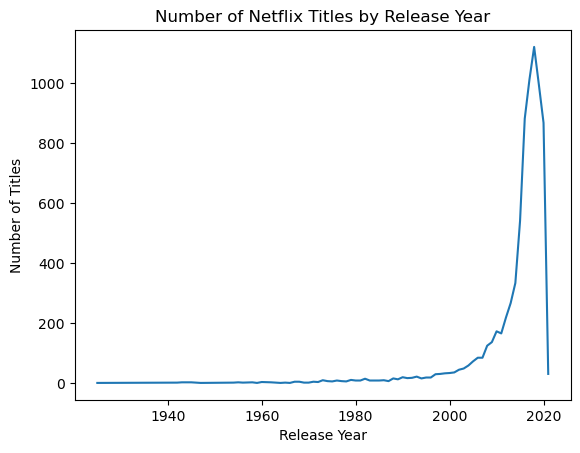

In [9]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Netflix Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

There is a clear increase in the number of titles released after 2010.
This reflects Netflix’s rapid growth and its focus on expanding
its catalog with more recent content.

## Graph 3: Top 10 Genres


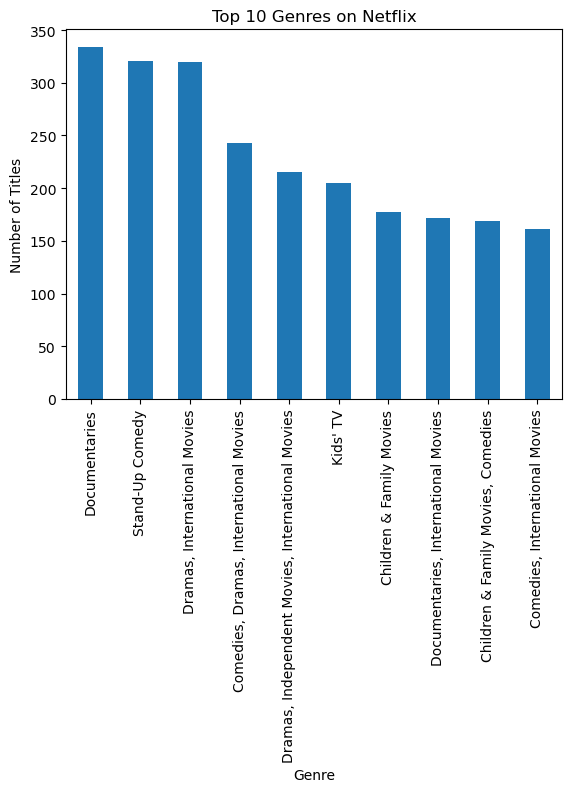

In [10]:
df['genres'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.show()

Documentaries appear as the most common genre in the dataset.